In [1]:
from keras import backend as K
from keras.models import load_model
from keras import metrics
import tensorflow as tf
import numpy as np
import scipy.misc
import argparse
import cv2
import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_test(directory):
    ImageList = sorted(glob.glob(directory+'/*'))
    LR = []
    HR = []
    for Image in ImageList:
        BaseImage = cv2.imread(Image)
        Height, Width = 256, 256
        BaseImage = cv2.resize(BaseImage,dsize=(256,256))
        HighResolutionImage = BaseImage.copy()
        ResizedBaseImage = cv2.resize(BaseImage,dsize=(int(Height/4),int( Width/4)), interpolation = cv2.INTER_CUBIC)
        LowResolutionImage = cv2.resize(ResizedBaseImage, dsize=(Height, Width),interpolation = cv2.INTER_CUBIC )
        
        LR.append(LowResolutionImage)
        HR.append(HighResolutionImage)

    val_in = np.asarray(LR , dtype=np.float32)
    val_out = np.asarray(HR , dtype= np.float32)

    return val_in, val_out

In [3]:
parser = argparse.ArgumentParser(description='Test function')
parser.add_argument('--test', metavar='test', type=str, 
                    help='test directory')
parser.add_argument('--network', metavar='network', type=str, 
                    help='network weight')
args = parser.parse_args(['--test','C:\\Users\\user\\Downloads\\Compressed\\sample\\test','--network','VDSR.h5'])

In [4]:
val_in, val_out = load_test(directory = args.test)

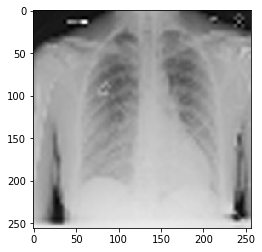

In [5]:
plt.imshow(val_in[77].astype(np.uint8))

In [6]:
val_out.shape

(150, 256, 256, 3)

In [7]:
model = load_model(args.network)

In [8]:
pred_list= model.predict(val_in,batch_size=1,verbose=1)

150/150 [==============================] - 163s 1s/step


In [9]:
pred_list.shape

(150, 256, 256, 3)

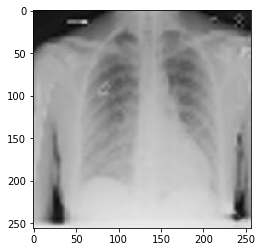

In [10]:
plt.imshow(pred_list[77].astype(np.uint8))

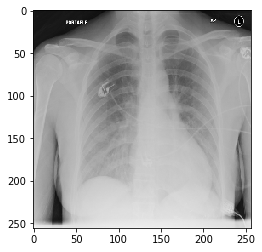

In [11]:
plt.imshow(val_out[77].astype(np.uint8))

In [13]:
import sewar

In [14]:
uqi=0
for i in range(150):
    uqi+= sewar.full_ref.uqi(val_out[i].astype(np.uint8),pred_list[i].astype(np.uint8))
uqi/=150

uqi

0.9860097437368167

In [15]:
psnr=0
for i in range(150):
    psnr+= sewar.full_ref.psnr(val_out[i].astype(np.uint8),pred_list[i].astype(np.uint8))
psnr/=150

psnr

28.8018854064303

In [16]:
ssim=0
for i in range(150):
    ssim+= sewar.full_ref.ssim(val_out[i].astype(np.uint8),pred_list[i].astype(np.uint8))[0]
ssim/=150

ssim

0.912259943082491

In [17]:
ms_ssim=0
for i in range(150):
    ms_ssim+= sewar.full_ref.msssim(val_out[i].astype(np.uint8),pred_list[i].astype(np.uint8))
ms_ssim/=150

ms_ssim

(0.9727890093899753+0j)

In [14]:
cv2.imwrite('C:/Users/user/Desktop/AI project 2/superresolution/VDSR/LR'+'{0:03d}'.format(1)+'.png', val_in[77])
#cv2.imwrite('C:/Users/user/Desktop/AI project 2/superresolution/HR'+'{0:03d}'.format(img_count)+'.png', img_out)
cv2.imwrite('C:/Users/user/Desktop/AI project 2/superresolution/VDSR/GR'+'{0:03d}'.format(1)+'.png', pred_list[77])

True